In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lamarck = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment13/Lamarck/Lamarck_rawdata.csv",header=0,index_col=[0,1])
lamarck

590        579         588         589
F1  Times1   231.306633  90.438568  257.062222  265.643423
    Times2   235.569180  92.345372  241.812219  263.931203
    Times3   258.844882  96.327977  246.252145  273.693376
    Times4   237.883136  94.586219  256.411147  275.376886
    Times5   256.121091  94.642054  254.311794  239.854703
...                 ...        ...         ...         ...
F13 Times6    18.831257   5.986710   19.324499   17.739523
    Times7    17.815280   6.601005   19.965696   18.729478
    Times8    19.375599   6.492381   19.988125   20.854435
    Times9    18.736001   5.963805   16.903289   19.725309
    Times10   23.717955   6.221873   18.110373   19.931951

[130 rows x 4 columns]

In [3]:
baldiwn = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment13/Baldwin/Baldwin_rawdata.csv",header=0,index_col=[0,1])
baldiwn

590           579           588           589  \
F1  Times1   14817.733787  6.816038e+05  5.180551e+05  6.601959e+05   
    Times2    1005.534207  6.492013e+05  5.229002e+05  7.676425e+05   
    Times3     425.467631  6.535778e+05  4.460751e+05  7.103812e+05   
    Times4     419.664752  7.263422e+05  5.501979e+05  7.083932e+05   
    Times5    3749.262323  7.149837e+05  7.228104e+05  6.158251e+05   
...                   ...           ...           ...           ...   
F13 Times6      51.405704  7.469325e+09  3.320785e+09  4.522051e+09   
    Times7      39.525752  7.722735e+09  3.006614e+08  7.150317e+09   
    Times8    2927.657002  6.796203e+09  1.677246e+09  4.870554e+09   
    Times9      94.908106  5.093243e+09  8.087380e+07  4.051755e+09   
    Times10     87.660170  1.126876e+10  9.103089e+08  4.358361e+09   

                      569           558           542           562  
F1  Times1   5.045515e+05  7.315957e+05  6.950532e+05  8.297618e+05  
    Times2   5.232637e+05  7.374991e+05  6.544509e+05  8.058911e+05  
    Times3   6.046580e+05  8.450160e+05  6.956507e+05  7.755980e+05  
    Times4   3.926822e+05  8.080432e+05  6.534091e+05  8.715756e+05  
    Times5   5.877818e+05  7.673516e+05  7.327740e+05  8.243826e+05  
...                   ...           ...           ...           ...  
F13 Times6   1.572237e+09  8.750226e+09  6.955934e+09  1.228716e+10  
    Times7   4.464887e+09  1.004957e+10  8.546775e+09  1.338603e+10  
    Times8   5.359009e+09  1.311363e+10  9.340780e+09  1.389366e+10  
    Times9   1.754499e+09  9.697730e+09  7.468655e+09  1.306889e+10  
    Times10  2.294809e+09  1.174322e+10  8.032442e+09  1.285033e+10  

[130 rows x 8 columns]

In [4]:
ssga = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment13/SSGA/SSGA_rawdata.csv",header=0,index_col=[0,1])
ssga

FileNotFoundError: [Errno 2] No such file or directory: '/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment13/SSGA/SSGA_rawdata.csv'

In [5]:
# df = pd.concat([ssga,baldiwn,lamarck],keys=["SSGA","Baldwin","Lamarck"])
df = pd.concat([baldiwn,lamarck],keys=["Baldwin","Lamarck"])
df = df.stack()
df = df.rename_axis(["Algorithm","Function","Runs","Combination"])
df = df.reset_index(level=[0,1],name="Final solution")
df["Final solution"] = pd.to_numeric(df["Final solution"])
df = df.reset_index(drop=False)
df

,Runs,Combination,Algorithm,Function,Final solution
0,Times1,590,Baldwin,F1,14817.733787
1,Times1,579,Baldwin,F1,681603.836739
2,Times1,588,Baldwin,F1,518055.137017
3,Times1,589,Baldwin,F1,660195.886371
4,Times1,569,Baldwin,F1,504551.454503
...,...,...,...,...,...
1555,Times9,589,Lamarck,F13,19.725309
1556,Times10,590,Lamarck,F13,23.717955
1557,Times10,579,Lamarck,F13,6.221873
1558,Times10,588,Lamarck,F13,18.110373


In [6]:
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 400, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [1,3,4,5,6,7,8,9,10,11,12,13]
# function_list = [1,2,3,5,6,7,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [7]:
def globalminimum(value):
    for i in function_list:
        if value == "F"+str(i):
            return opt[i-1]
df["Global minimum"] = df["Function"].map(globalminimum)
df

,Runs,Combination,Algorithm,Function,Final solution,Global minimum
0,Times1,590,Baldwin,F1,14817.733787,0.0
1,Times1,579,Baldwin,F1,681603.836739,0.0
2,Times1,588,Baldwin,F1,518055.137017,0.0
3,Times1,589,Baldwin,F1,660195.886371,0.0
4,Times1,569,Baldwin,F1,504551.454503,0.0
...,...,...,...,...,...,...
1555,Times9,589,Lamarck,F13,19.725309,0.0
1556,Times10,590,Lamarck,F13,23.717955,0.0
1557,Times10,579,Lamarck,F13,6.221873,0.0
1558,Times10,588,Lamarck,F13,18.110373,0.0


In [8]:
df["distance"] = abs(df["Final solution"] - df["Global minimum"])
df

,Runs,Combination,Algorithm,Function,Final solution,Global minimum,distance
0,Times1,590,Baldwin,F1,14817.733787,0.0,14817.733787
1,Times1,579,Baldwin,F1,681603.836739,0.0,681603.836739
2,Times1,588,Baldwin,F1,518055.137017,0.0,518055.137017
3,Times1,589,Baldwin,F1,660195.886371,0.0,660195.886371
4,Times1,569,Baldwin,F1,504551.454503,0.0,504551.454503
...,...,...,...,...,...,...,...
1555,Times9,589,Lamarck,F13,19.725309,0.0,19.725309
1556,Times10,590,Lamarck,F13,23.717955,0.0,23.717955
1557,Times10,579,Lamarck,F13,6.221873,0.0,6.221873
1558,Times10,588,Lamarck,F13,18.110373,0.0,18.110373


In [9]:
import seaborn as sns

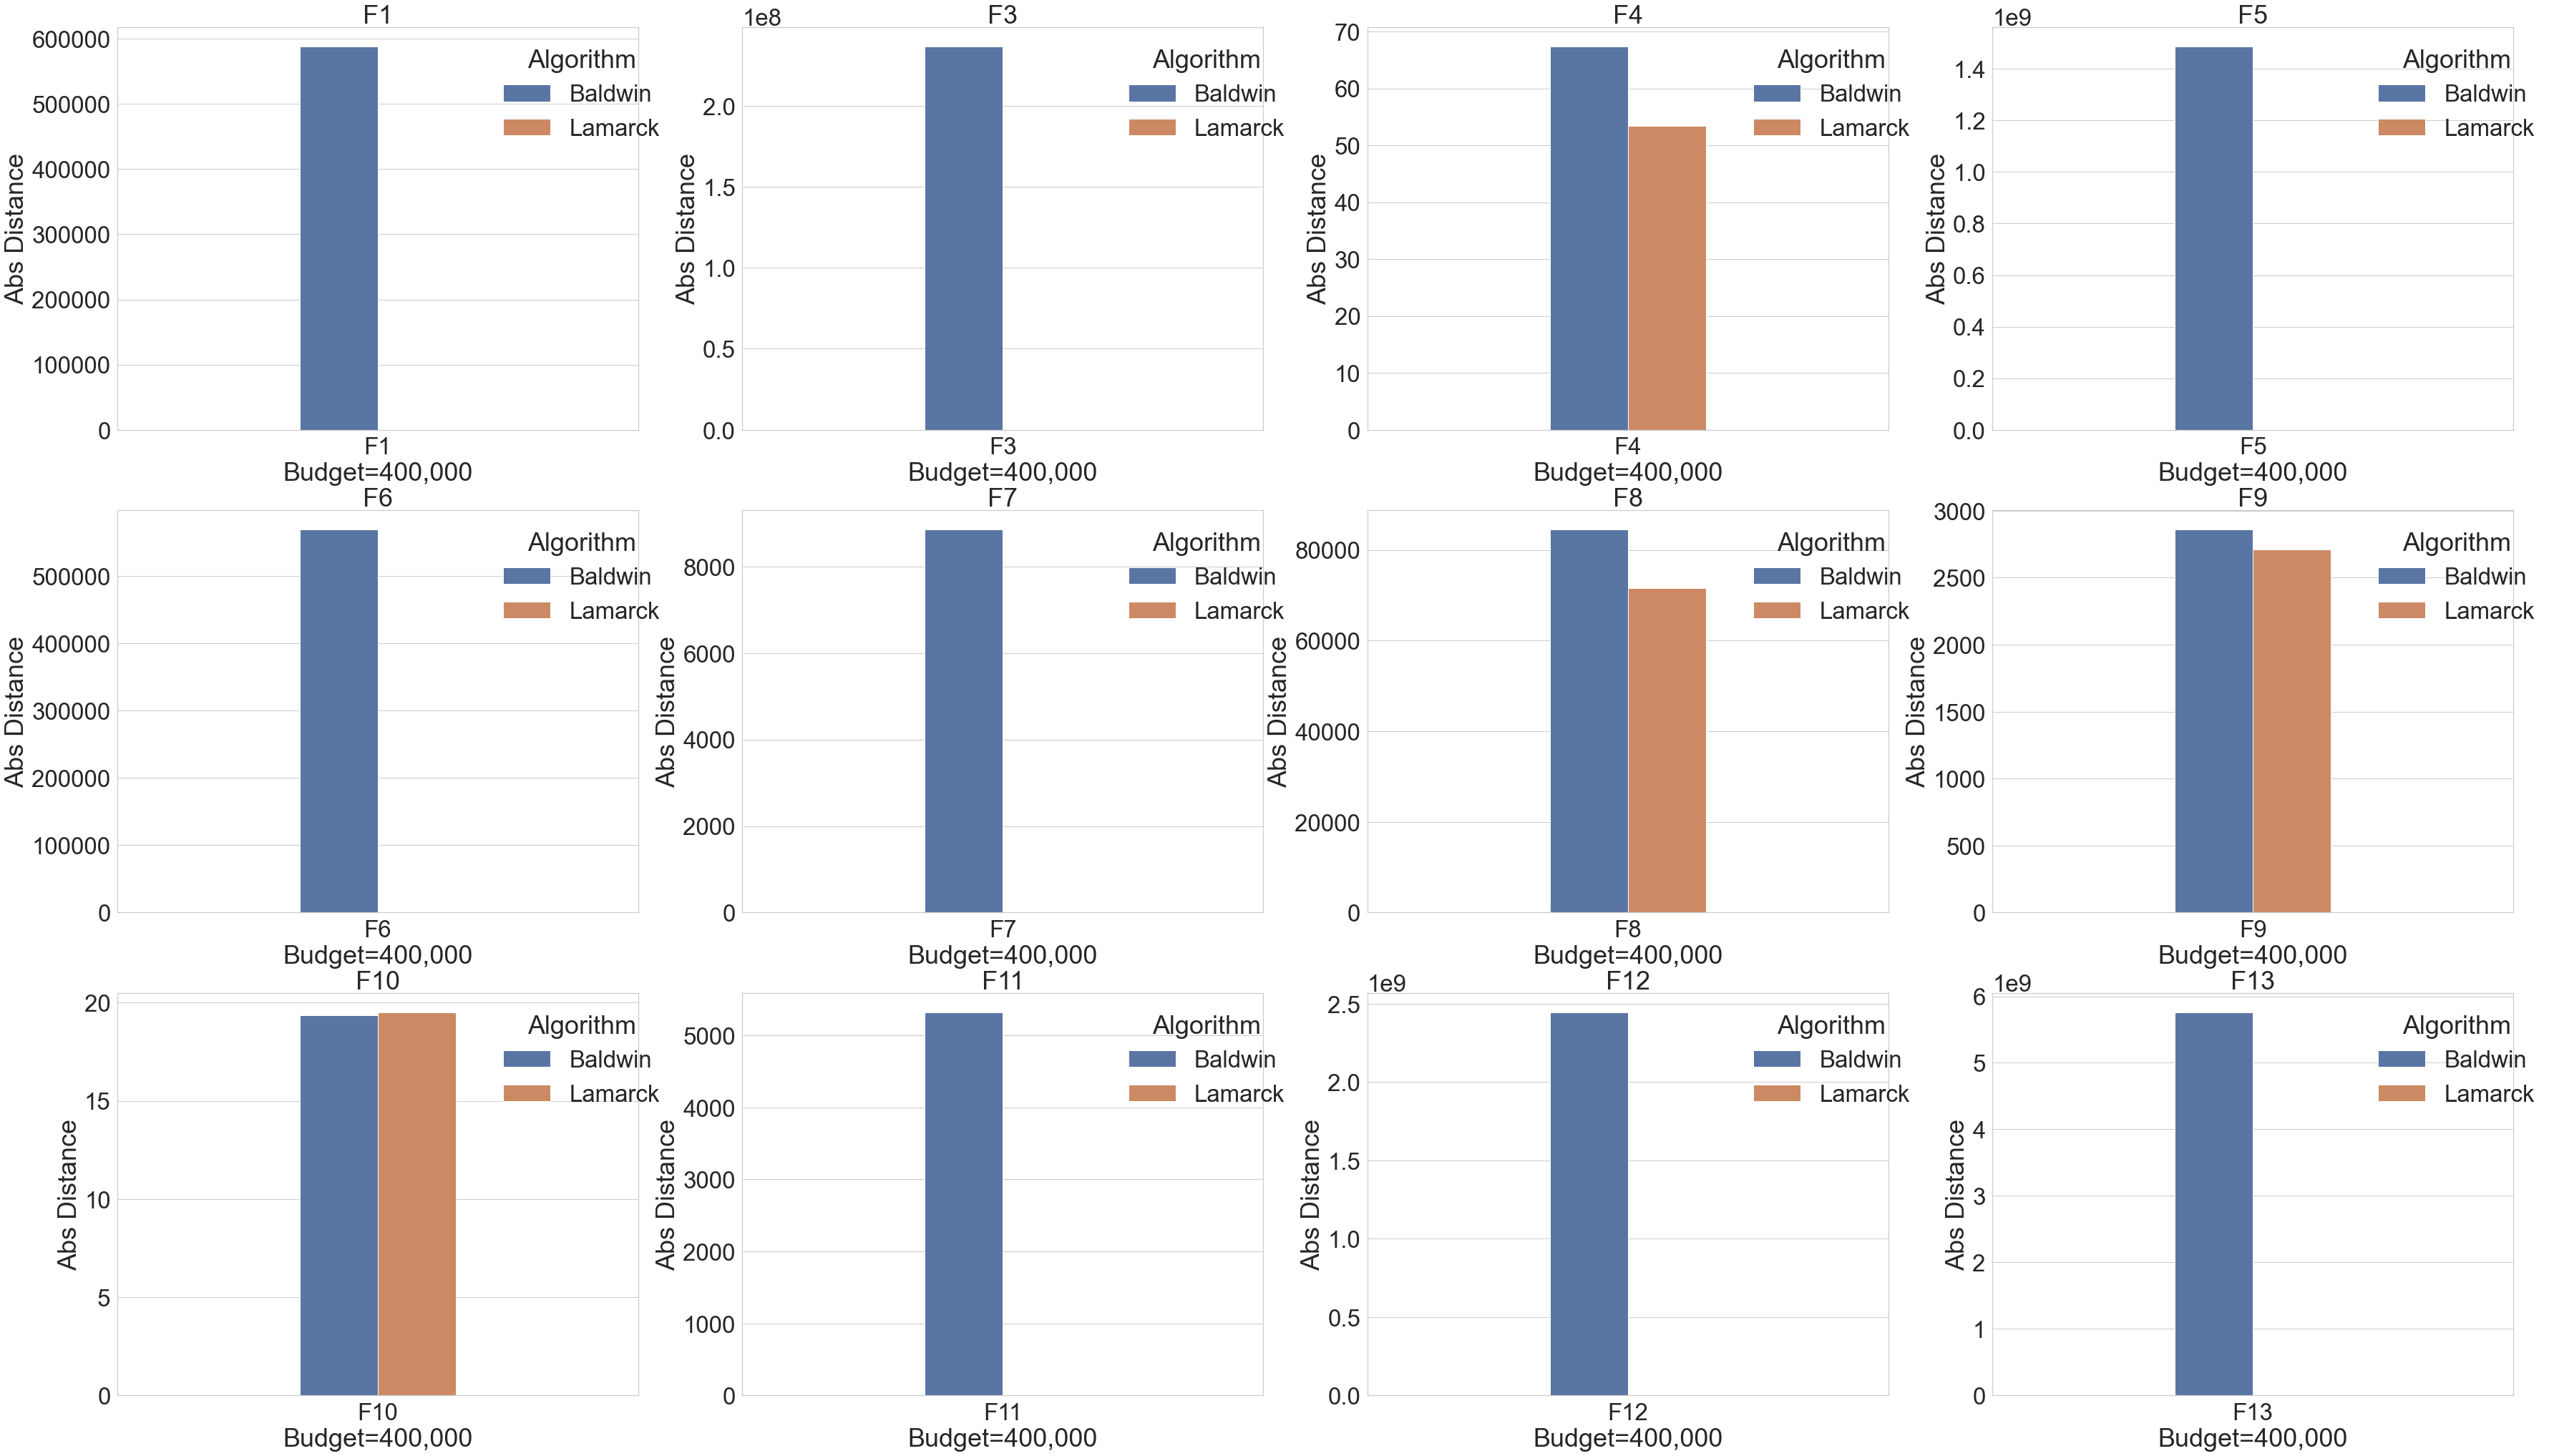

In [15]:
func_list=["F"+str(i) for i in function_list]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 4
    dist_rows = 5
    plt.figure(figsize=(15 * dist_cols, 12 * dist_rows))
    i = 1
    for func in func_list:
        sns.set_theme(style="whitegrid",font_scale=3)
        data = dataframe[dataframe["Function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax =sns.barplot(data=data,y="distance",x="Function",hue="Algorithm",width=0.3,errorbar=None)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0.7, 1),frameon=False)
        plt.xlabel("Budget=400,000")
        plt.ylabel(f"Abs Distance")
        plt.title(f"{func}")
        i = i + 1
    plt.savefig("./distance.png", dpi=400,bbox_inches='tight')
    plt.show()
show_graph(dataframe=df)

/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_43294/3135713121.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  minmax["norm"]= minmax.groupby(["Function"]).transform(lambda x: (x - x.min()) /(x.max()-x.min()))["Final solution"]
/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_43294/3135713121.py:3: RuntimeWarning: invalid value encountered in double_scalars
  minmax["norm"]= minmax.groupby(["Function"]).transform(lambda x: (x - x.min()) /(x.max()-x.min()))["Final solution"]


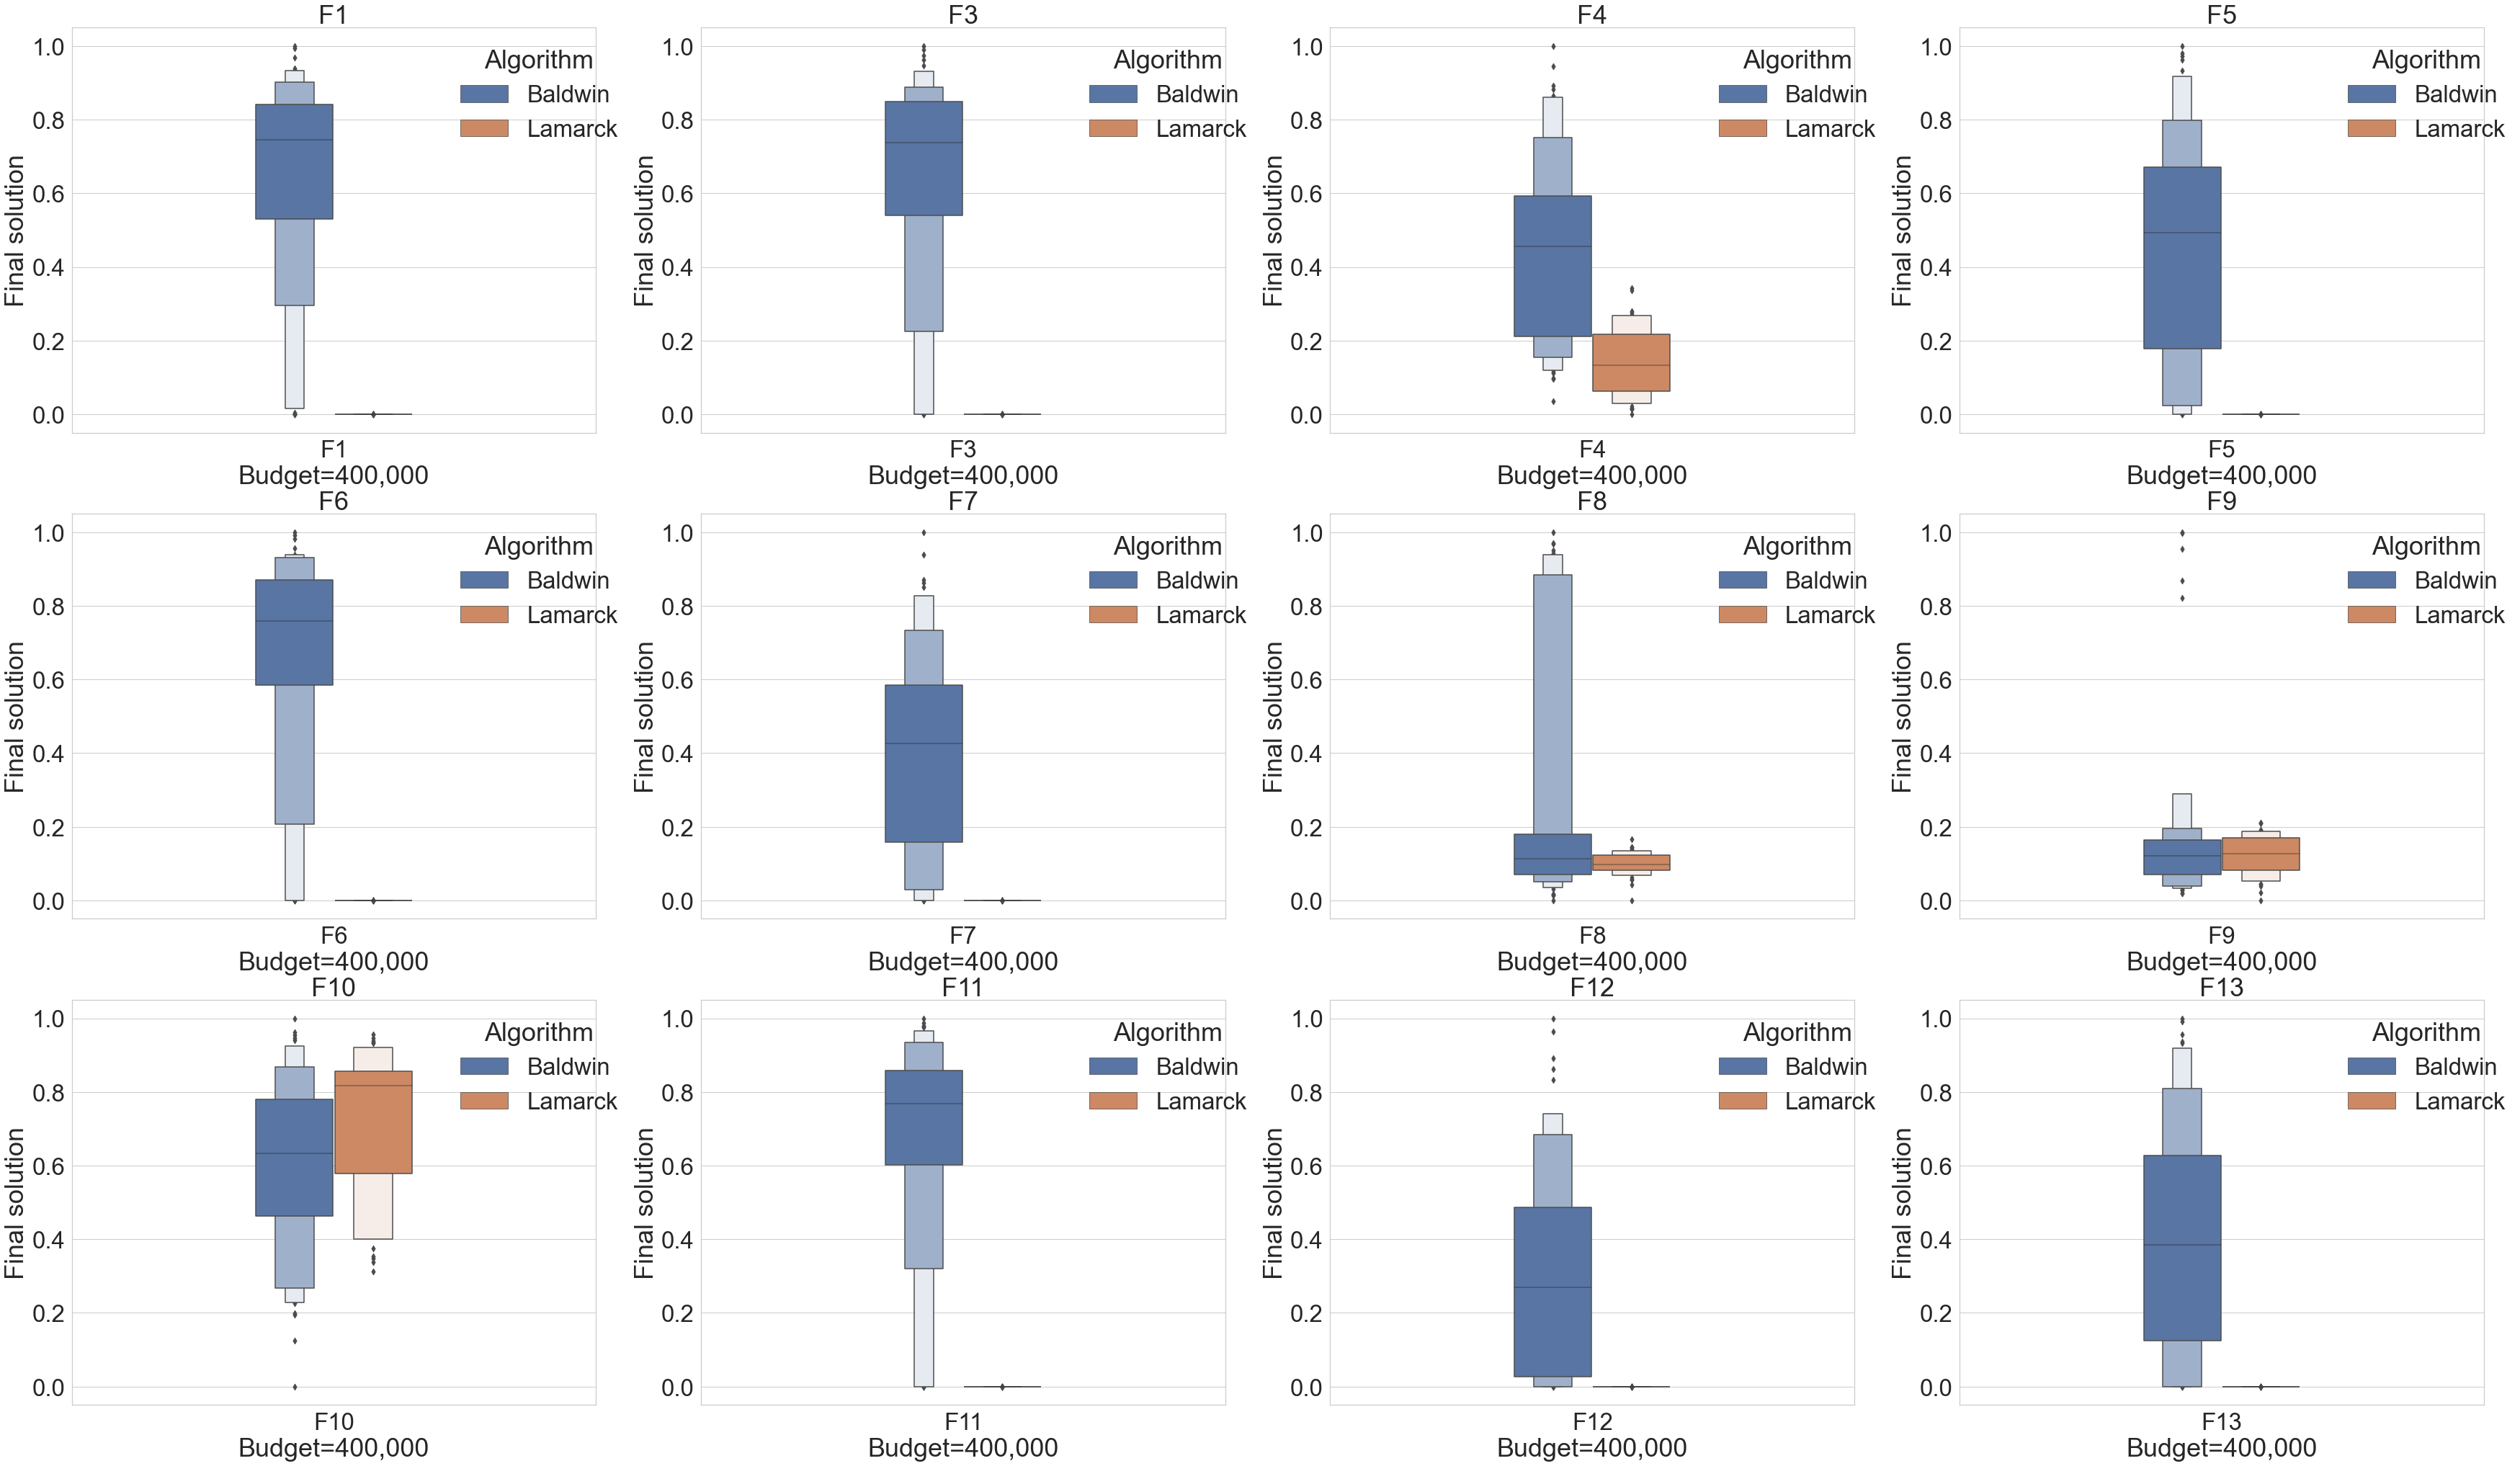

In [16]:
op = [opt[i-1] for i in function_list]
minmax = df.copy()
minmax["norm"]= minmax.groupby(["Function"]).transform(lambda x: (x - x.min()) /(x.max()-x.min()))["Final solution"]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", font_scale=1.5)
    sns.set_style("ticks", {'axes.grid': True})
    dist_cols = 4
    dist_rows = 5
    plt.figure(figsize=(15 * dist_cols, 12 * dist_rows))
    i = 1
    for func in func_list:
        sns.set_theme(style="whitegrid", font_scale=3)
        data = dataframe[dataframe["Function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.boxenplot(data=data, y="norm", x="Function", hue="Algorithm", width=0.3)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0.7, 1), frameon=False)
        # plt.axhline(y=op[i-1],color="red",linewidth=1)
        plt.xlabel("Budget=400,000")
        plt.ylabel(f"Final solution")
        plt.title(f"{func}")
        i = i + 1
    plt.savefig("./final.png", dpi=400, bbox_inches='tight')
    plt.show()
show_graph(dataframe=minmax)

In [17]:
cond = df[df["Algorithm"]!="Baldwin"]
cond

,Runs,Combination,Algorithm,Function,Final solution,Global minimum,distance
1040,Times1,590,Lamarck,F1,231.306633,0.0,231.306633
1041,Times1,579,Lamarck,F1,90.438568,0.0,90.438568
1042,Times1,588,Lamarck,F1,257.062222,0.0,257.062222
1043,Times1,589,Lamarck,F1,265.643423,0.0,265.643423
1044,Times2,590,Lamarck,F1,235.569180,0.0,235.569180
...,...,...,...,...,...,...,...
1555,Times9,589,Lamarck,F13,19.725309,0.0,19.725309
1556,Times10,590,Lamarck,F13,23.717955,0.0,23.717955
1557,Times10,579,Lamarck,F13,6.221873,0.0,6.221873
1558,Times10,588,Lamarck,F13,18.110373,0.0,18.110373


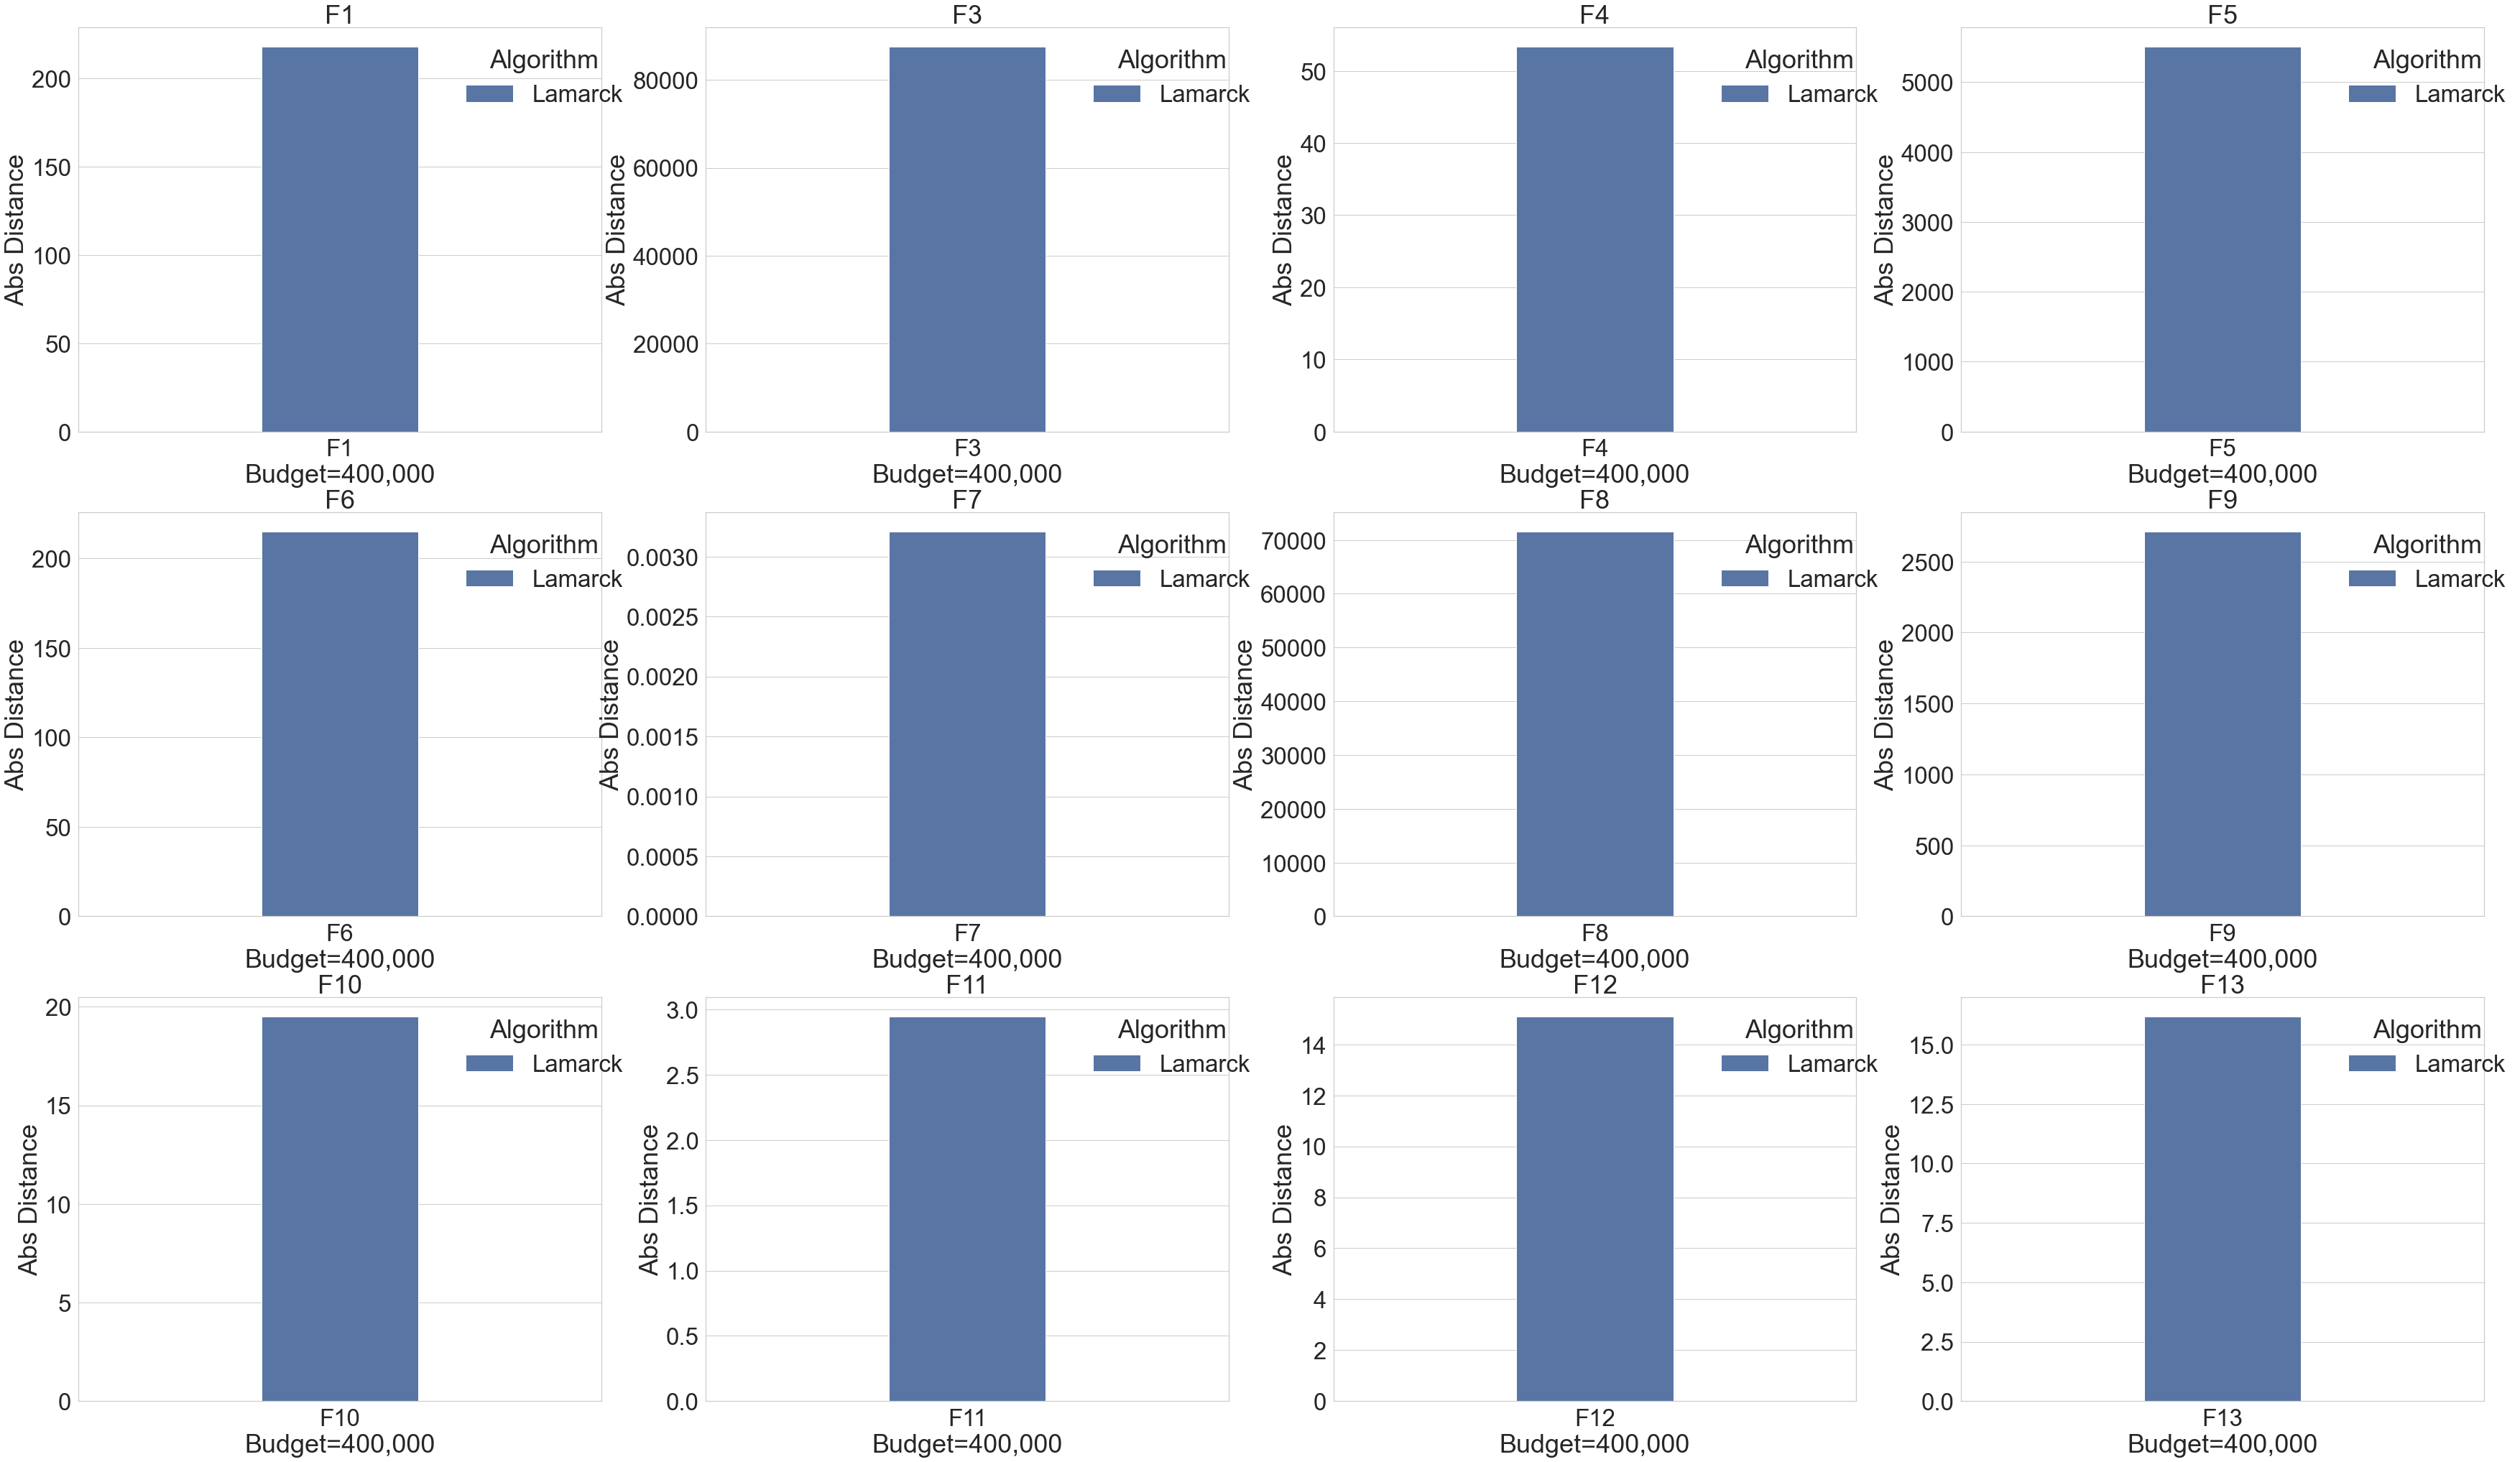

In [18]:
func_list=["F"+str(i) for i in function_list]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 4
    dist_rows = 5
    plt.figure(figsize=(15 * dist_cols, 12 * dist_rows))
    i = 1
    for func in func_list:
        sns.set_theme(style="whitegrid",font_scale=3)
        data = dataframe[dataframe["Function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax =sns.barplot(data=data,y="distance",x="Function",hue="Algorithm",width=0.3,errorbar=None)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0.7, 1),frameon=False)
        plt.xlabel("Budget=400,000")
        plt.ylabel(f"Abs Distance")
        plt.title(f"{func}")
        i = i + 1
    plt.savefig("./distance2.png", dpi=400,bbox_inches='tight')
    plt.show()
show_graph(dataframe=cond)

/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_43294/3098150904.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  minmax["norm"]= minmax.groupby(["Function"]).transform(lambda x: (x - x.min()) /(x.max()-x.min()))["Final solution"]
/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_43294/3098150904.py:2: RuntimeWarning: invalid value encountered in double_scalars
  minmax["norm"]= minmax.groupby(["Function"]).transform(lambda x: (x - x.min()) /(x.max()-x.min()))["Final solution"]


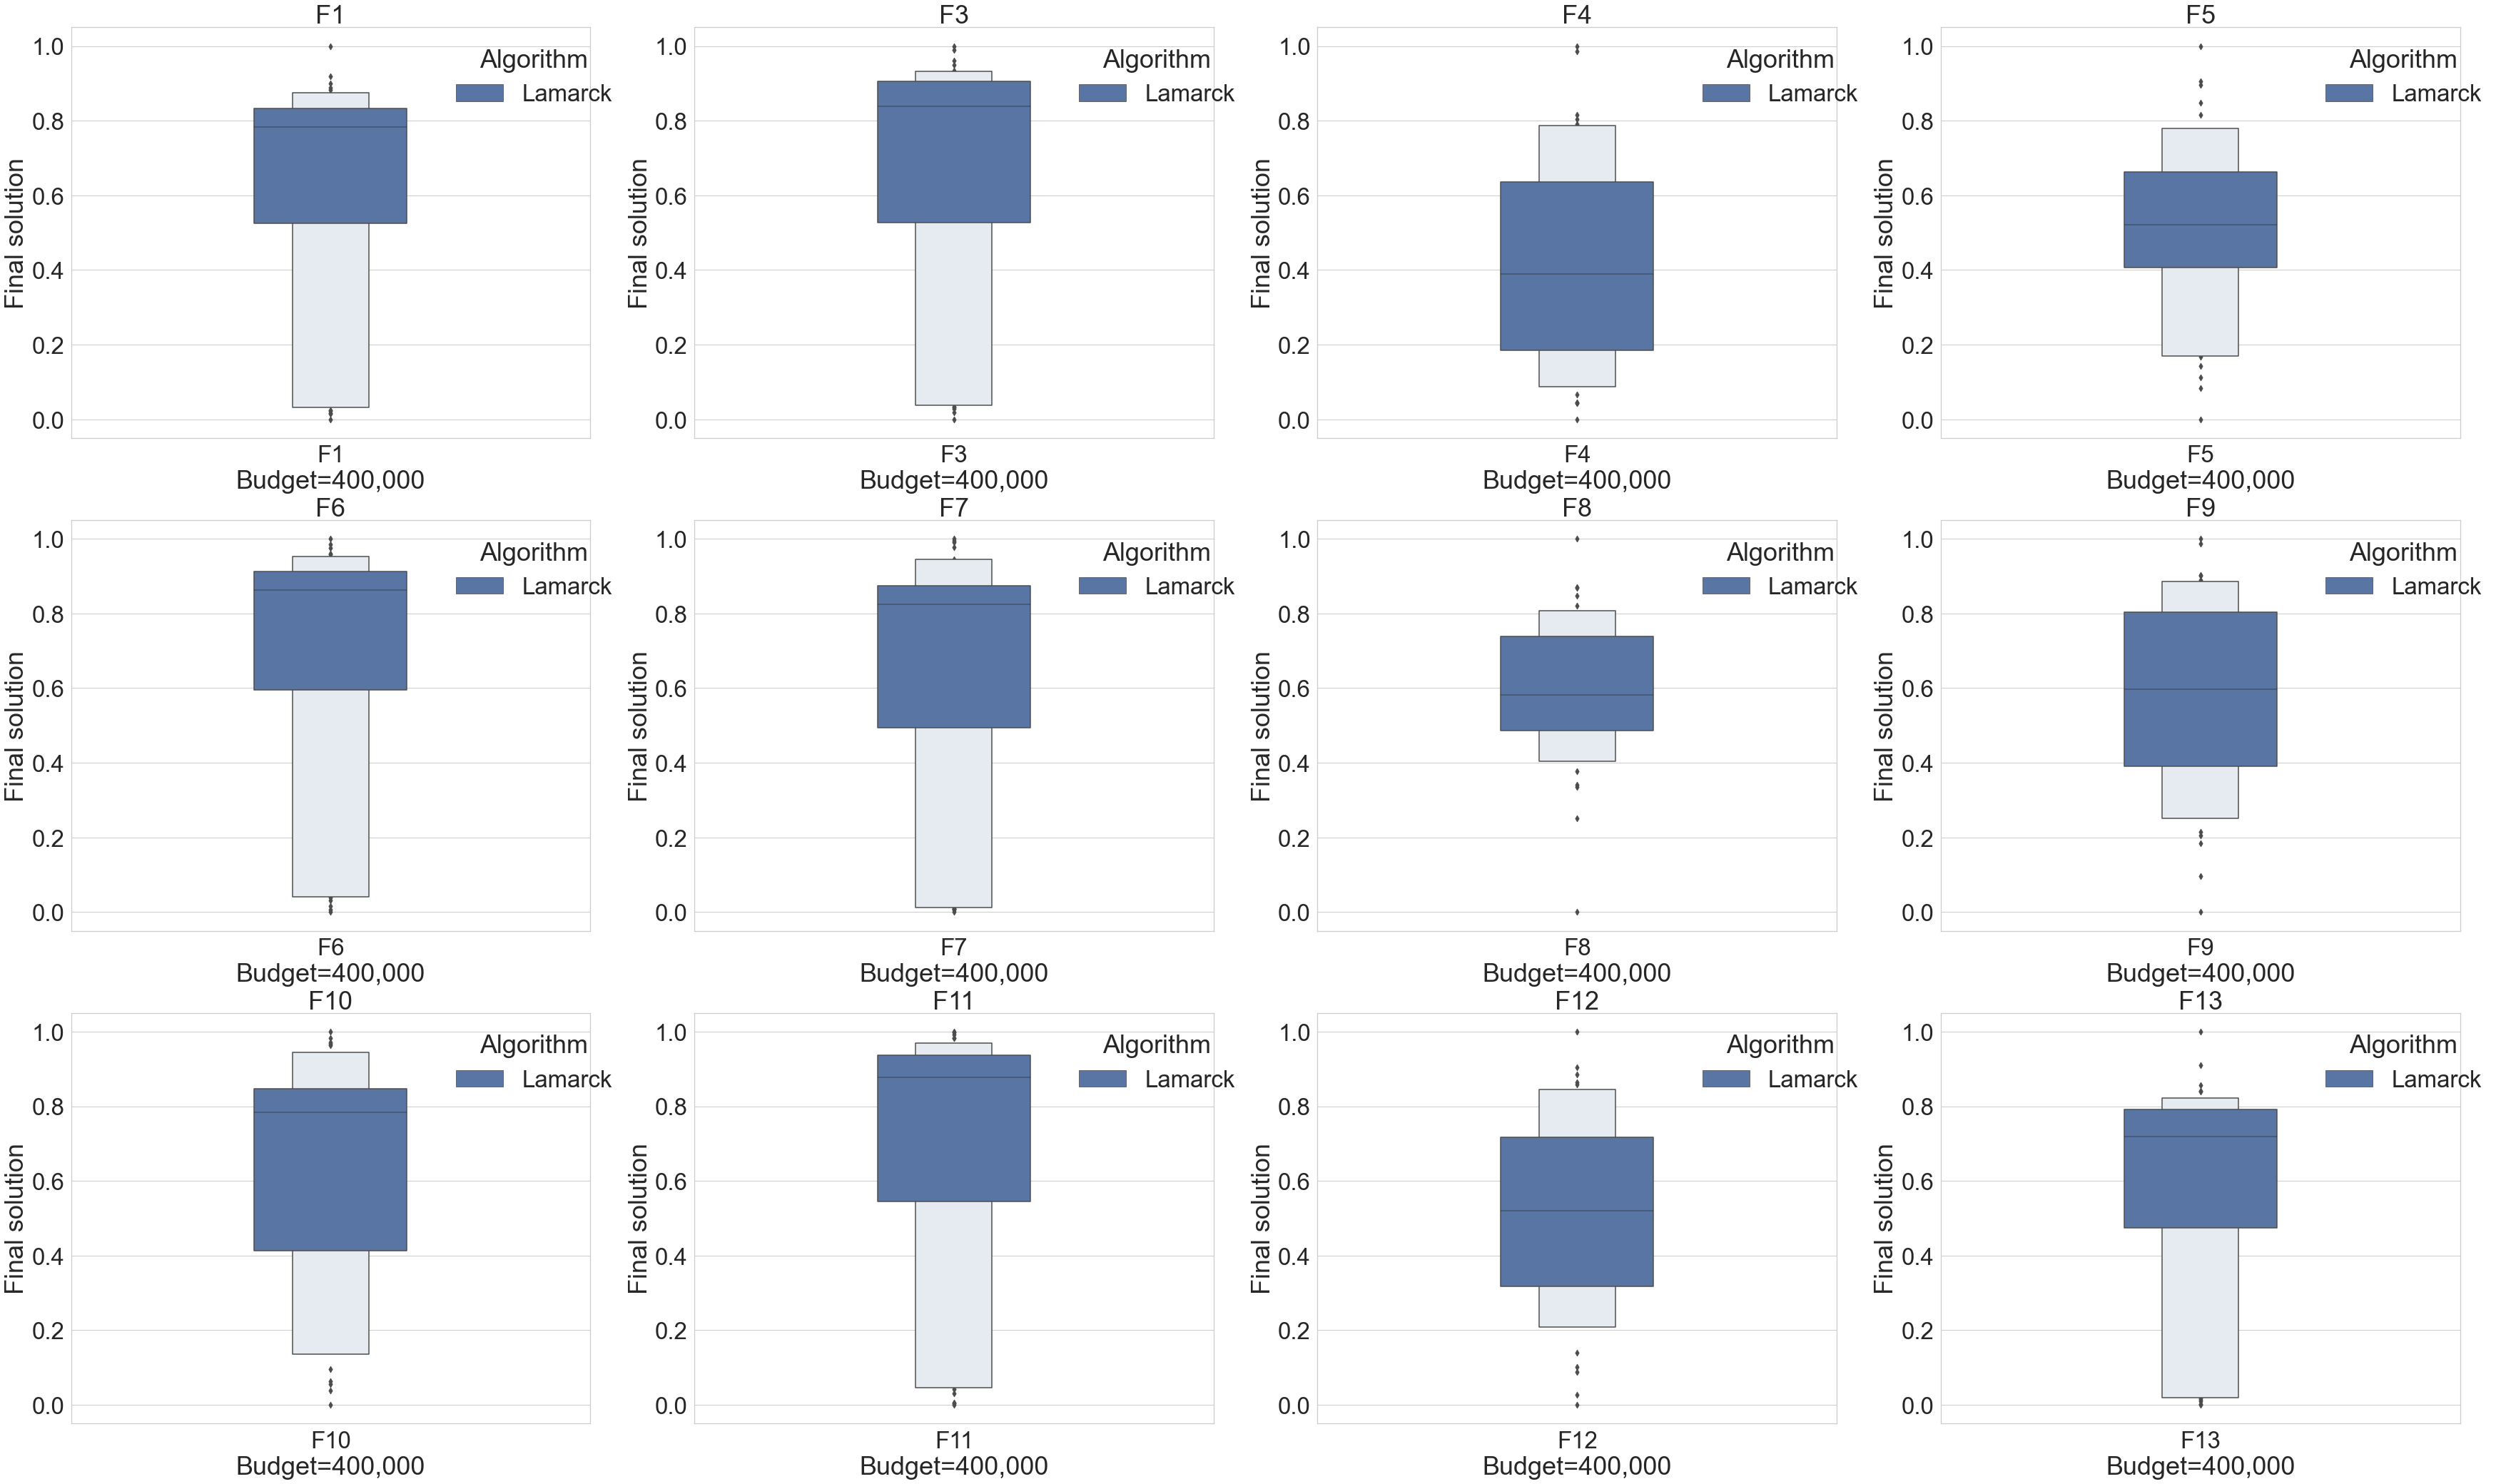

In [19]:

minmax = cond.copy()
minmax["norm"]= minmax.groupby(["Function"]).transform(lambda x: (x - x.min()) /(x.max()-x.min()))["Final solution"]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", font_scale=1.5)
    sns.set_style("ticks", {'axes.grid': True})
    dist_cols = 4
    dist_rows = 3
    plt.figure(figsize=(15 * dist_cols, 12 * dist_rows))
    i = 1
    for func in func_list:
        sns.set_theme(style="whitegrid", font_scale=3)
        data = dataframe[dataframe["Function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.boxenplot(data=data, y="norm", x="Function", hue="Algorithm", width=0.3)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0.7, 1), frameon=False)
        plt.xlabel("Budget=400,000")
        plt.ylabel(f"Final solution")
        plt.title(f"{func}")
        i = i + 1
    plt.savefig("./final2.png", dpi=400, bbox_inches='tight')
    plt.show()
show_graph(dataframe=minmax)